# 1. Finding text

use command line to download a book from a url - this particular book is *The Adventures of Sherlock Holmes* by Arthur Conan Doyle

In [ ]:
!wget https://www.gutenberg.org/files/1661/1661-0.txt

--2023-03-10 14:40:21--  https://www.gutenberg.org/files/1661/1661-0.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607430 (593K) [text/plain]
Saving to: ‘1661-0.txt’

1661-0.txt          100%[===================>] 593.19K  3.17MB/s    in 0.2s    

2023-03-10 14:40:23 (3.17 MB/s) - ‘1661-0.txt’ saved [607430/607430]



Section of the book (paragraph #2) manually copied-and-pasted into the file `1661-0-sample.txt`

# 2. Command line methods

The wc command counts the number of lines, words, and characters in a text file

In [ ]:
!wc 1661-0.txt
!wc 1661-0-sample.txt

 12304 107560 607427 1661-0.txt
  18  222 1318 1661-0-sample.txt


grep (short for 'global regular expression print') searches for strings and text in a file

the below regular expressions 'the', etc. return lines containing the string, not just 'the' but also 'loa**the**d'; 'fish' and 'sel**fish**', etc.

In [ ]:
!grep 'the' 1661-0-sample.txt

from each other. My own complete happiness, and the home-centred
interests which rise up around the man who first finds himself master
while Holmes, who loathed every form of society with his whole Bohemian
the drowsiness of the drug, and the fierce energy of his own keen
nature. He was still, as ever, deeply attracted by the study of crime,
mysteries which had been abandoned as hopeless by the official police.
summons to Odessa in the case of the Trepoff murder, of his clearing up
of the singular tragedy of the Atkinson brothers at Trincomalee, and
finally of the mission which he had accomplished so delicately and
successfully for the reigning family of Holland. Beyond these signs of
his activity, however, which I merely shared with all the readers of
the daily press, I knew little of my former friend and companion.


In [ ]:
!grep 'fish' 1661-0.txt

monograph upon the deep-sea fishes.
“The fish that you have tattooed immediately above your right wrist
trick of staining the fishes’ scales of a delicate pink is quite
Windibank, it was as cruel and selfish and heartless a trick in a petty
“I fished about with a rake. I thought there might be some weapon or
morning letters, if I remember right, were from a fish-monger and a
“No, it is not selfishness or conceit,” said he, answering, as was his


In [ ]:
!grep 'house' -o 1661-0.txt

house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house
house


* The -o part of the below commands is known as a 'flag' - this is a sort of operator that can change how a command behaves. In the below examples the -o flag means grep only returns the matched text rather than the whole matched line

* the | 'pipe' character allows commands to be combined. Here we first collect all the string matches with the grep command and then use the wc command to count them - the -l flag outputs only the number of lines; here each string match is output on its own line, so this is equivalent to counting the matches.

In [ ]:
!grep -o 'the' 1661-0.txt | wc -l
!grep -o 'fish' 1661-0.txt | wc -l
!grep -o 'house' 1661-0.txt | wc -l

7231
7
147


# 3. Regular expressions

In [ ]:
import re

# load sample into python
with open('1661-0-sample.txt', 'r') as f:
    text_sample = f.read()

In [ ]:
text_sample

'I had seen little of Holmes lately. My marriage had drifted us away\nfrom each other. My own complete happiness, and the home-centred\ninterests which rise up around the man who first finds himself master\nof his own establishment, were sufficient to absorb all my attention,\nwhile Holmes, who loathed every form of society with his whole Bohemian\nsoul, remained in our lodgings in Baker Street, buried among his old\nbooks, and alternating from week to week between cocaine and ambition,\nthe drowsiness of the drug, and the fierce energy of his own keen\nnature. He was still, as ever, deeply attracted by the study of crime,\nand occupied his immense faculties and extraordinary powers of\nobservation in following out those clues, and clearing up those\nmysteries which had been abandoned as hopeless by the official police.\nFrom time to time I heard some vague account of his doings: of his\nsummons to Odessa in the case of the Trepoff murder, of his clearing up\nof the singular tragedy of

The python library `re` has some useful built-in functions. Below we use `findall` which returns all matches.

Our regular expression string can be broken up into four components:
* `\b` indicates a word boundary - whatever comes next in the regular expression must be at the start of a word
* `[aeiou]` matches any one of the characters between the brackets.
* `[a-zA-Z]` matches any letter (lower or upper case). 
* The `+` modifier matches between one and unlimited occurences of the previous token - here, that means any number of letters (following the first matched vowel).

In [ ]:
re.findall(r'\b[aeiouAEIOU][a-zA-Z]+', text_sample)

['of',
 'us',
 'away',
 'each',
 'other',
 'own',
 'and',
 'interests',
 'up',
 'around',
 'of',
 'own',
 'establishment',
 'absorb',
 'all',
 'attention',
 'every',
 'of',
 'in',
 'our',
 'in',
 'among',
 'old',
 'and',
 'alternating',
 'and',
 'ambition',
 'of',
 'and',
 'energy',
 'of',
 'own',
 'as',
 'ever',
 'attracted',
 'of',
 'and',
 'occupied',
 'immense',
 'and',
 'extraordinary',
 'of',
 'observation',
 'in',
 'out',
 'and',
 'up',
 'abandoned',
 'as',
 'official',
 'account',
 'of',
 'of',
 'Odessa',
 'in',
 'of',
 'of',
 'up',
 'of',
 'of',
 'Atkinson',
 'at',
 'and',
 'of',
 'accomplished',
 'and',
 'of',
 'of',
 'activity',
 'all',
 'of',
 'of',
 'and']

# 4. Tokenization

before using nltk we must first download some nltk data

In [ ]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
some_strings = [
    "The quick brown fox jumped over the lazy dog.",
    "Everything Everywhere All at Once",
    "Mr. Baron-Cohen and Mrs. O'Neill co-operated on a short-term plan.",
    "Here-is a; m3ssy- str!ng"
]

In [ ]:
for s in some_strings:
    print(word_tokenize(s))

['The', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog', '.']
['Everything', 'Everywhere', 'All', 'at', 'Once']
['Mr.', 'Baron-Cohen', 'and', 'Mrs.', "O'Neill", 'co-operated', 'on', 'a', 'short-term', 'plan', '.']
['Here-is', 'a', ';', 'm3ssy-', 'str', '!', 'ng']


In [ ]:
text_sample_tokens = word_tokenize(text_sample)

In [ ]:
text_sample_tokens[:25]

['I',
 'had',
 'seen',
 'little',
 'of',
 'Holmes',
 'lately',
 '.',
 'My',
 'marriage',
 'had',
 'drifted',
 'us',
 'away',
 'from',
 'each',
 'other',
 '.',
 'My',
 'own',
 'complete',
 'happiness',
 ',',
 'and',
 'the']

Not all tokens are words - nltk separates punctuation such as commas and full stops. Tokens can be repeated.

# 5. N-grams

In [ ]:
from nltk import bigrams, ngrams

In [ ]:
text_sample_bigrams = list(bigrams(text_sample_tokens))

In [ ]:
text_sample_bigrams[:10]

[('I', 'had'),
 ('had', 'seen'),
 ('seen', 'little'),
 ('little', 'of'),
 ('of', 'Holmes'),
 ('Holmes', 'lately'),
 ('lately', '.'),
 ('.', 'My'),
 ('My', 'marriage'),
 ('marriage', 'had')]

In [ ]:
text_sample_3grams = list(ngrams(text_sample_tokens, 3))
text_sample_4grams = list(ngrams(text_sample_tokens, 4))

In [ ]:
text_sample_3grams[:10]

[('I', 'had', 'seen'),
 ('had', 'seen', 'little'),
 ('seen', 'little', 'of'),
 ('little', 'of', 'Holmes'),
 ('of', 'Holmes', 'lately'),
 ('Holmes', 'lately', '.'),
 ('lately', '.', 'My'),
 ('.', 'My', 'marriage'),
 ('My', 'marriage', 'had'),
 ('marriage', 'had', 'drifted')]

In [ ]:
text_sample_4grams[:10]

[('I', 'had', 'seen', 'little'),
 ('had', 'seen', 'little', 'of'),
 ('seen', 'little', 'of', 'Holmes'),
 ('little', 'of', 'Holmes', 'lately'),
 ('of', 'Holmes', 'lately', '.'),
 ('Holmes', 'lately', '.', 'My'),
 ('lately', '.', 'My', 'marriage'),
 ('.', 'My', 'marriage', 'had'),
 ('My', 'marriage', 'had', 'drifted'),
 ('marriage', 'had', 'drifted', 'us')]

# 6. & 7. Bag of words representation and Cleaning

In [ ]:
from nltk.corpus import stopwords

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

def BoW(text, n=1, clean=False):
    tokens = word_tokenize(text) # tokenize text
    
    if clean:
        tokens = clean_tokens(tokens)

    if n > 1: # optionally use bigrams
        tokens = ngrams(tokens, n)
    
    token_frequency = Counter(tokens) # get Counter (like a dictionary) of the frequency of each token
    return token_frequency


def BoW_hist(token_frequency, n_top=10):
    top_tokens = token_frequency.most_common(n_top)

    w, f = [[i for i,j in top_tokens], [j for i,j in top_tokens]]
    
    fig, ax = plt.subplots(figsize=(6 * n_top/10,4))
    ax.bar(range(n_top), f)
    ax.set_xticks(range(n_top))
    ax.set_xticklabels(w, rotation=45, ha='right')
    
    return fig, ax


def clean_tokens(tokens):
    sw = stopwords.words('english') # nltk's collection of English-language stopwords
    punctuation = [',', '.', ';', '“', '”', '’', '‘', '!', '?', '\'\'', '``', '--'] # non-exhaustive list of punctuation commonly found in the three books of interest
    tokens = [s.lower() for s in tokens]
    tokens = [s for s in tokens if s not in punctuation and s not in sw] # make all tokens lowercase
    return tokens

In [ ]:
BoW(text_sample).most_common(5)

[('of', 18), (',', 18), ('the', 15), ('and', 10), ('his', 9)]

## Compare three texts

Download two new books

In [ ]:
!wget https://www.gutenberg.org/cache/epub/37106/pg37106.txt
!wget https://www.gutenberg.org/cache/epub/16389/pg16389.txt

--2023-03-10 15:15:33--  https://www.gutenberg.org/cache/epub/37106/pg37106.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1123165 (1.1M) [text/plain]
Saving to: ‘pg37106.txt’

pg37106.txt         100%[===================>]   1.07M  4.79MB/s    in 0.2s    

2023-03-10 15:15:34 (4.79 MB/s) - ‘pg37106.txt’ saved [1123165/1123165]

--2023-03-10 15:15:34--  https://www.gutenberg.org/cache/epub/16389/pg16389.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 475035 (464K) [text/plain]
Saving to: ‘pg16389.txt’

pg16389.txt         100%[===================>] 463.90K  2.43MB/s    in 0.2s    

2023-03-10 15:15:35 (2

In [ ]:
texts = []
book_paths = ['1661-0.txt', 'pg16389.txt', 'pg37106.txt']
for path in book_paths:
    with open(path, 'r') as f:
        texts.append(f.read())

In [ ]:
texts_token_freq = [BoW(x) for x in texts]

In [ ]:
book_names = [
    'The Adventures of Sherlock Holmes - Arthur Conan Doyle, 1892', 
    'Little Women - Louisa M. Alcott, 1868', 
    'The Enchanted April - Elizabeth Von Arnim, 1922'
]

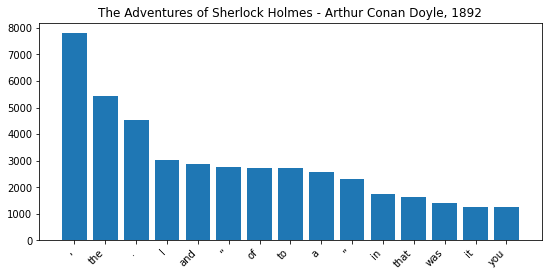

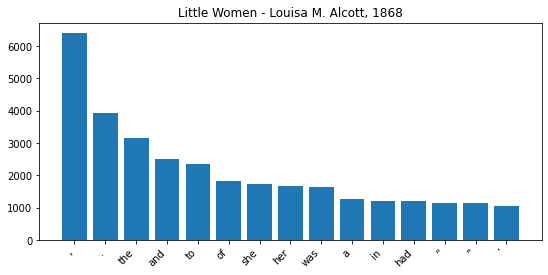

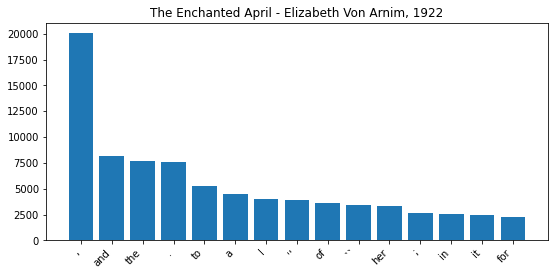

In [ ]:
for i, x in enumerate(texts_token_freq):
    fig, ax = BoW_hist(x, n_top=15)
    ax.set_title(book_names[i])
    plt.show()

## Using bigrams

In [ ]:
texts_bigram_freq = [BoW(x, n=2) for x in texts]

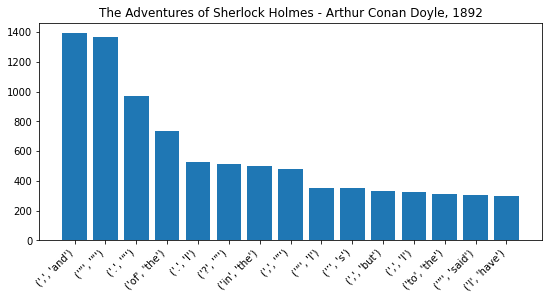

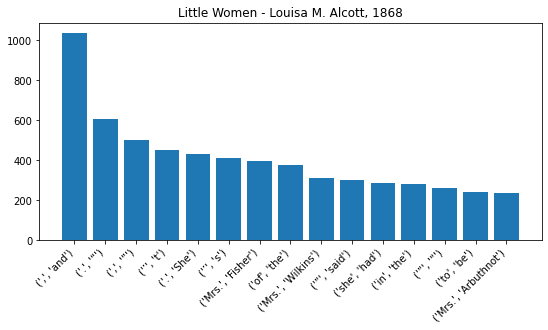

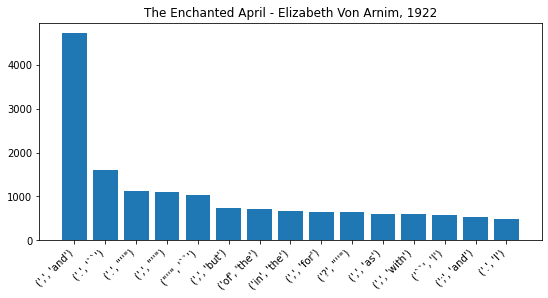

In [ ]:
for i, x in enumerate(texts_bigram_freq):
    fig, ax = BoW_hist(x, n_top=15)
    ax.set_title(book_names[i])
    plt.show()

## Now with cleaning

In [ ]:
texts_clean_token_freq = [BoW(x, clean=True) for x in texts]

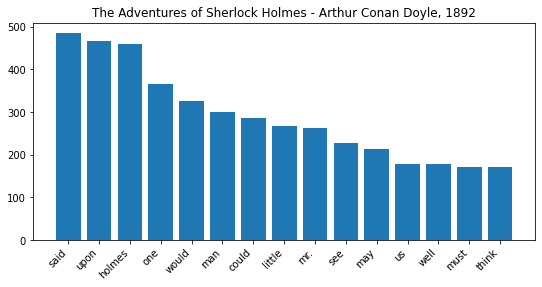

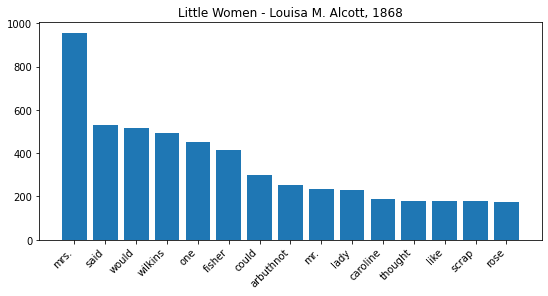

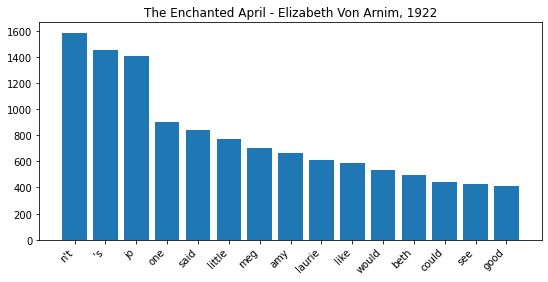

In [ ]:
for i, x in enumerate(texts_clean_token_freq):
    fig, ax = BoW_hist(x, n_top=15)
    ax.set_title(book_names[i])
    plt.show()

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each